# Test

#### Import the necessary libraries

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np
import sys
import torch

# Add the root project directory to the Python path
ROOT = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(ROOT))
from configs.path_config import EXTRACTED_DATA_DIR, WEIGHTS_DIR, FEATURES
from src.processing import dataset
from src import utils

#### Create the data loader

In [6]:
folder_path = EXTRACTED_DATA_DIR / 'group_alvbrodel_shifted'
data = dataset.StrainDataset(folder_path, FEATURES, sequence_length=128, start_idx=11112, test_size=0.3)

c:\Users\gwd007\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\gwd007\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\gwd007\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\gwd007\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


#### Load the model

In [7]:
model = torch.load(WEIGHTS_DIR / 'lstm_model_8_32_1_5_0.01_0.3.pth')
print(model)

LSTMModel(
  (lstm): LSTM(8, 32, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=32, out_features=8, bias=True)
)


C:\Users\gwd007\AppData\Local\Temp\ipykernel_66076\1685268353.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(WEIGHTS_DIR / 'lstm_model_8_32_1_5_0.01_

#### Plot the anomalies

Shape of data_subset: (4439, 128, 8)
Shape of reconstructed: (4439, 8)
Features----------------------------------
S-F_Close_Comp.txt_I,F,1.6 - Strain
S-F_Close_Comp.txt_I,F,1.6 - Temperature
S-F_Close_Comp.txt_I,F,1.6 - Rolling_mean
S-F_Close_Comp.txt_I,F,1.6 - Rolling_std
S-F_Close_Comp.txt_II,F,0.06 - Strain
S-F_Close_Comp.txt_II,F,0.06 - Temperature
S-F_Close_Comp.txt_II,F,0.06 - Rolling_mean
S-F_Close_Comp.txt_II,F,0.06 - Rolling_std

[DEBUG] anomalous_indices: []
[DEBUG] consecutive_anomalies: []
[DEBUG] timestamps length: 4439
[DEBUG] No consecutive anomalies found.

S-F_Close_Comp.txt_I,F,1.6 - Strain Anomalies:
Empty DataFrame
Columns: []
Index: []

[DEBUG] anomalous_indices: [3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394]
[DEBUG] consecutive_anomalies: [(3261, 3278), (3377, 3394)]
[DEBUG] timestamps length: 443

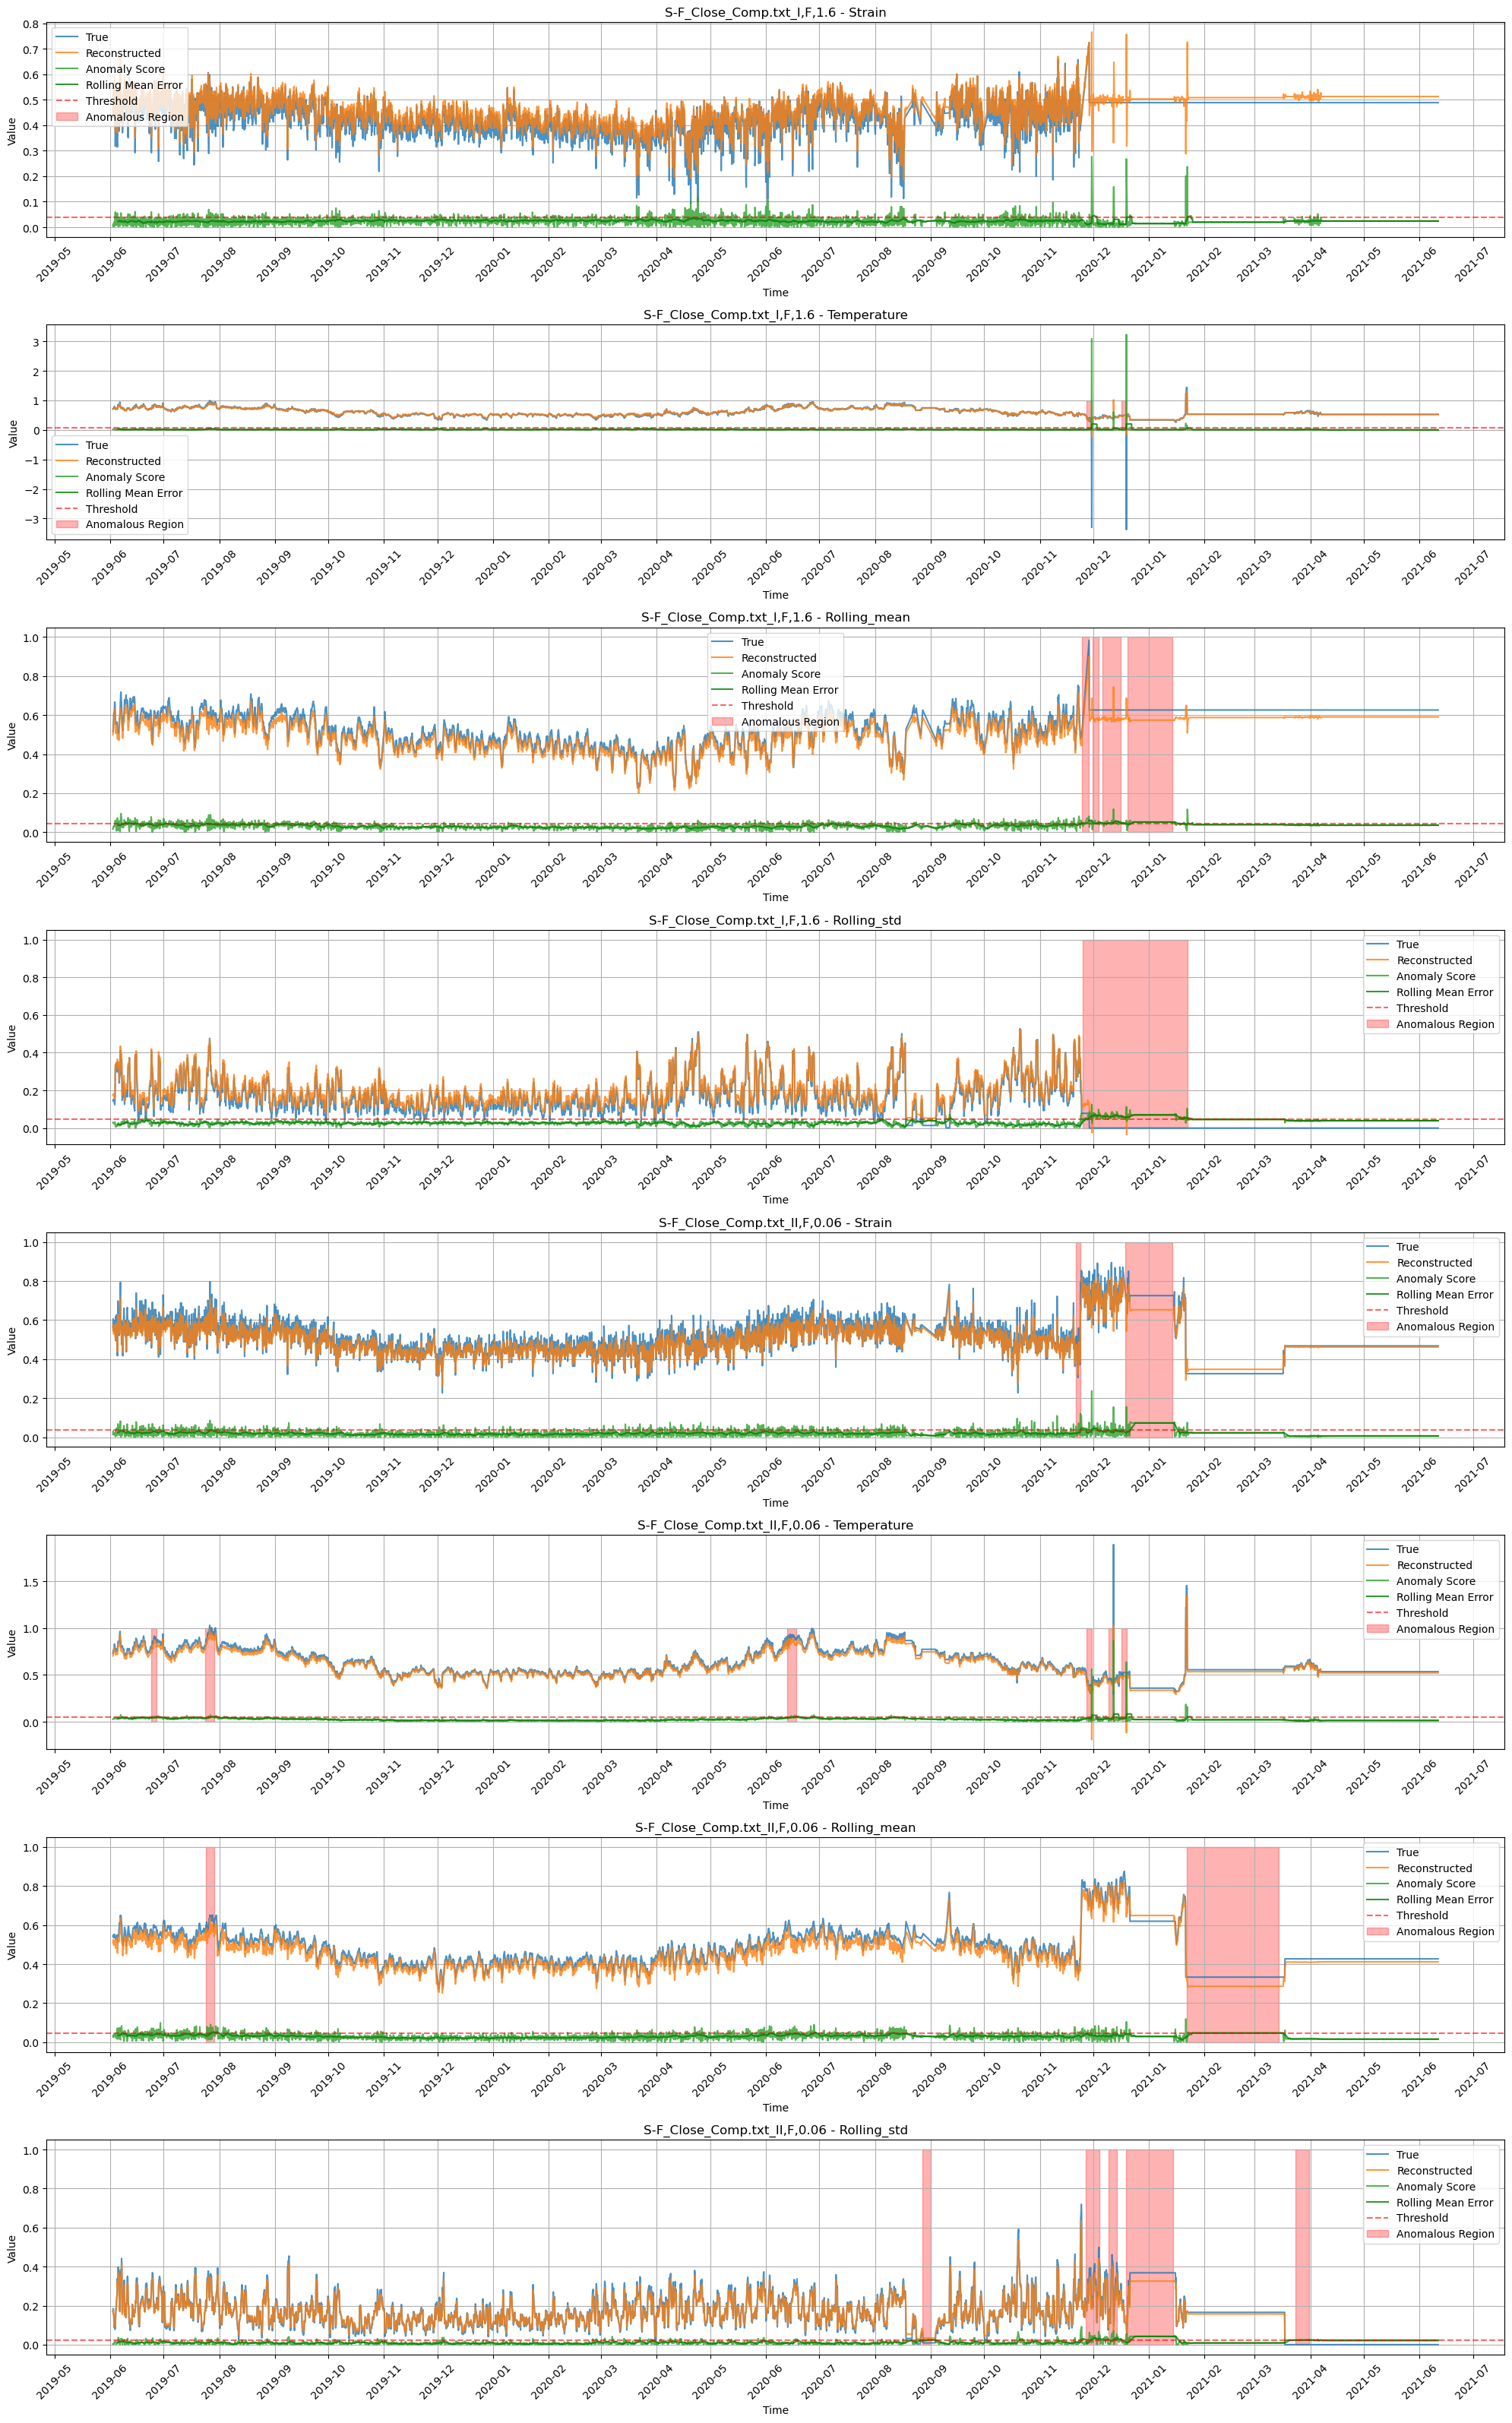

In [8]:
N = len(data.test_data)

feature_names = data.feature_names
# timestamps = data.timestamps_test
timestamps = pd.DatetimeIndex(data.timestamps_test)[:N]

reconstructed = utils.plot_reconstruction(data.test_data, model, N, feature_names, timestamps, mode=3)